# N-D Linear Regression

data location [data](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html)

pip install pandas
pip install xlrd

The data (X1, X2, X3, X4, X5) is by city.

* X1 = death rate per 1000 residents

* X2 = doctor availability per 100,000 residents

* X3 = hospital availability per 100,000 residents

* X4 = annual per capita income in thousands of dollars

* X5 = population density people per square mile

We will be holding X1 as our y value

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/mlr07.xls')
X = df.values

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [6]:
df.head()

,X1,X2,X3,X4,X5
0,8.0,78,284,9.1,109
1,9.3,68,433,8.7,144
2,7.5,70,739,7.2,113
3,8.9,96,1792,8.9,97
4,10.2,74,477,8.3,206


Are our relationships linear?

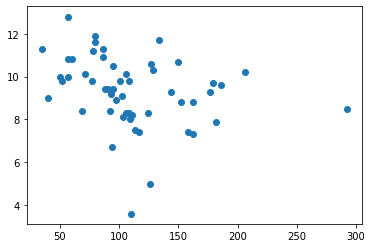

In [10]:
plt.scatter(X[:,4], X[:,0])
plt.show()